In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
plt.rcParams['figure.figsize'] = (20,6)

In [2]:
data = pd.read_csv('data/full_data.csv', delimiter = ';', parse_dates=True, index_col=0)

In [3]:
data

,timestamp,customer_no,location,weekday,time
0,2019-09-02 07:03:00,1,dairy,Monday,07:03:00
1,2019-09-02 07:03:00,2,dairy,Monday,07:03:00
2,2019-09-02 07:04:00,3,dairy,Monday,07:04:00
3,2019-09-02 07:04:00,4,dairy,Monday,07:04:00
4,2019-09-02 07:04:00,5,spices,Monday,07:04:00
...,...,...,...,...,...
5120,2019-09-06 21:50:00,1500,dairy,Friday,21:50:00
5121,2019-09-06 21:50:00,1507,checkout,Friday,21:50:00
5122,2019-09-06 21:50:00,1508,checkout,Friday,21:50:00
5123,2019-09-06 21:50:00,1509,drinks,Friday,21:50:00


In [4]:
data.dtypes

timestamp      object
customer_no     int64
location       object
weekday        object
time           object
dtype: object

In [5]:
data['timestamp'] = pd.to_datetime(data['timestamp'])

In [50]:
data.dtypes

timestamp      datetime64[ns]
customer_no             int64
location               object
weekday                object
time                   object
dtype: object

In [7]:
data.shape

(24877, 5)

In [8]:
data.isna().any()

timestamp      False
customer_no    False
location       False
weekday        False
time           False
dtype: bool

In [64]:
# Add unique customer index
data['customer_id']=data['weekday'].astype(str) + ' ' + data['customer_no'].astype(str)

In [9]:
# Total no of customers
data.groupby('weekday')['customer_no'].count()

weekday
Friday       5125
Monday       4884
Thursday     5104
Tuesday      4714
Wednesday    5050
Name: customer_no, dtype: int64

In [10]:
# Calculate the total number of customers in each section
data.groupby('location')['customer_no'].count().sort_values(ascending=False)

location
checkout    7417
fruit       5122
dairy       4679
drinks      3905
spices      3754
Name: customer_no, dtype: int64

In [19]:
# Additional calc: Calculate the total number of customers in each section by day of the week
pd.DataFrame(data.groupby(['weekday','location'])['customer_no'].count().sort_values(ascending=False))

,,customer_no
weekday,location,
Thursday,checkout,1532
Wednesday,checkout,1526
Friday,checkout,1502
Monday,checkout,1437
Tuesday,checkout,1420
Friday,fruit,1057
Wednesday,fruit,1043
Thursday,fruit,1041
Monday,fruit,1005


In [18]:
# Calculate the total number of customers in each section over time
pd.DataFrame(data.groupby(by=['location', 'timestamp'])['customer_no'].count())

customer_no
location timestamp                       
checkout 2019-09-02 07:05:00            2
         2019-09-02 07:06:00            2
         2019-09-02 07:07:00            1
         2019-09-02 07:08:00            3
         2019-09-02 07:09:00            1
...                                   ...
spices   2019-09-06 21:28:00            1
         2019-09-06 21:31:00            1
         2019-09-06 21:42:00            1
         2019-09-06 21:49:00            1
         2019-09-06 21:50:00            1

[13839 rows x 1 columns]

In [17]:
# Count customer for each hour for location
pd.DataFrame(data.set_index('timestamp').groupby([pd.Grouper(freq='H'), pd.Grouper('location')])['customer_no'].count())

customer_no
timestamp           location             
2019-09-02 07:00:00 checkout           92
                    dairy              59
                    drinks             60
                    fruit              54
                    spices             52
...                                   ...
2019-09-06 21:00:00 checkout           52
                    dairy              39
                    drinks             34
                    fruit              36
                    spices             20

[375 rows x 1 columns]

In [26]:
# Display the number of customers at checkout over time
pd.DataFrame(data.groupby(by=['location', 'timestamp'])['customer_no'].count()).filter(like='checkout', axis=0)

customer_no
location timestamp                       
checkout 2019-09-02 07:05:00            2
         2019-09-02 07:06:00            2
         2019-09-02 07:07:00            1
         2019-09-02 07:08:00            3
         2019-09-02 07:09:00            1
...                                   ...
         2019-09-06 21:37:00            1
         2019-09-06 21:45:00            1
         2019-09-06 21:47:00            2
         2019-09-06 21:48:00            2
         2019-09-06 21:50:00            2

[3460 rows x 1 columns]

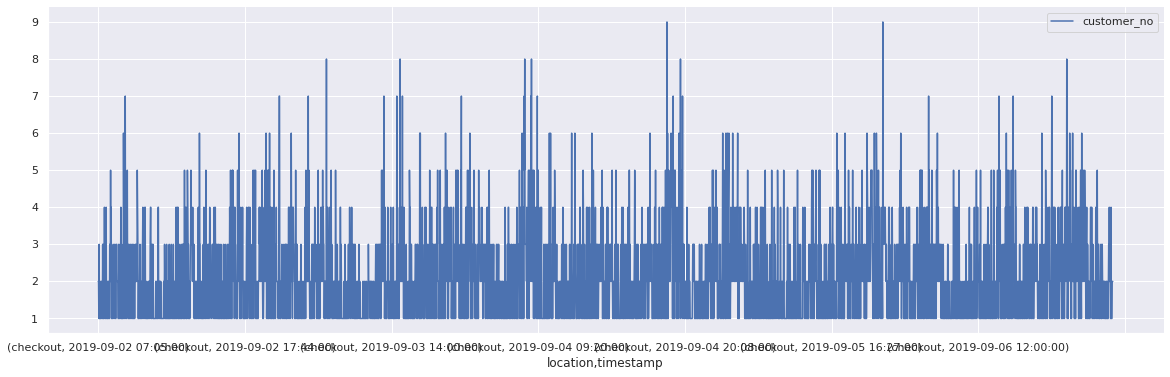

In [28]:
pd.DataFrame(data.groupby(by=['location', 'timestamp'])['customer_no'].count()).filter(like='checkout', axis=0).plot(kind="line")

In [81]:
# Calculate the time each customer spent in the market
time_df = pd.DataFrame(data.groupby(by=['customer_id'])['timestamp'].min())

In [82]:
time_df.shape

(7445, 1)

In [79]:
time_df_checkout = data[data['location'] == 'checkout']

In [89]:
time_df_checkout.set_index('customer_id', inplace=True)

In [95]:
time_df = time_df.join(time_df_checkout, on='customer_id', lsuffix='_first', rsuffix='_checkout')

In [106]:
time_df.drop(columns=['customer_no', 'weekday', 'time'], inplace=True)

In [107]:
time_df.isna().sum()

timestamp_first        0
timestamp_checkout    28
location              28
dtype: int64

In [ ]:
# Fill na with 10pm

In [ ]:
### TBD ###

In [ ]:
# Calculate time spent in supermarket

In [ ]:
### TBD ###

In [ ]:
time_df['time_spent']

In [ ]:
# Show descriptives of time_spent

In [ ]:
### TBD ###

In [ ]:
# Calculate the total number of customers in the supermarket over time

<AxesSubplot:xlabel='timestamp'>

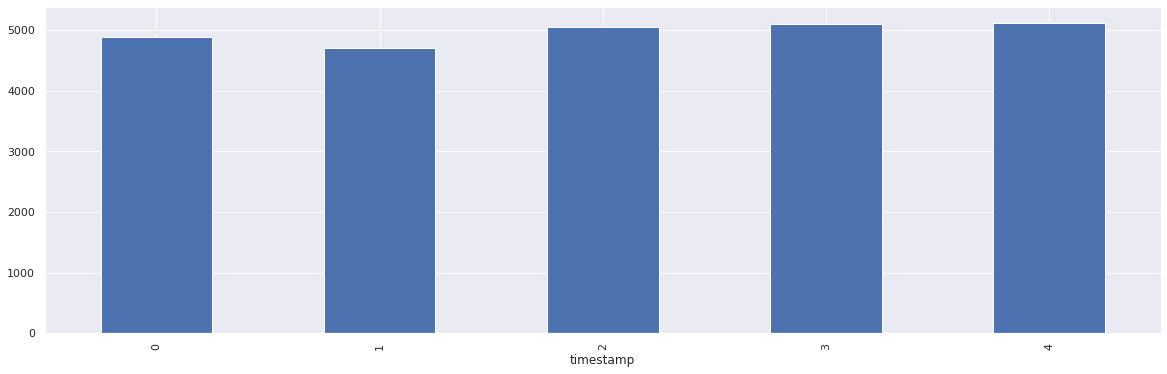

In [120]:
data.groupby(data['timestamp'].dt.weekday)['customer_id'].count().plot(kind="bar")

<AxesSubplot:xlabel='timestamp'>

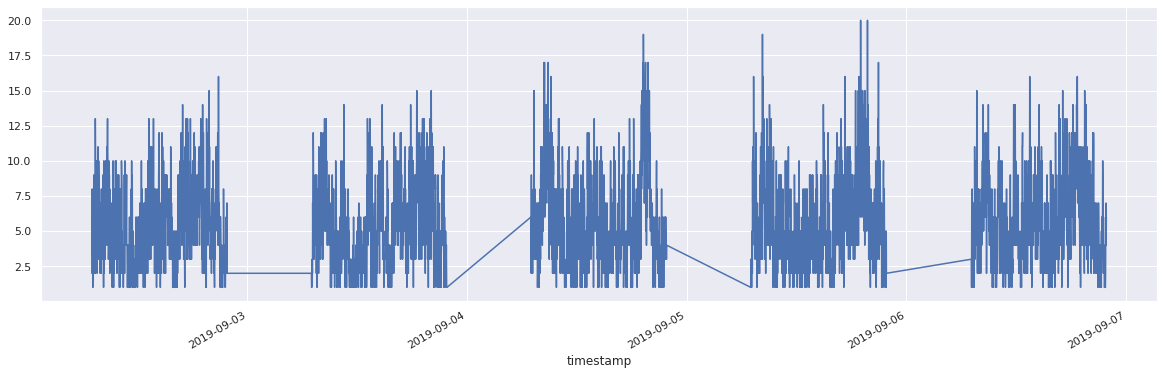

In [35]:
data.groupby(['timestamp'])['customer_no'].count().plot(kind="line")

In [ ]:
# Our business managers think that the first section customers visit follows a different pattern than the following ones.
# Plot the distribution of customers of their first visited section versus following sections (treat all sections visited after the first as “following”)

In [36]:
### TBD ###

In [ ]:
## Challenge revenue estimate:

In [ ]:
### TBD ###